In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
data = pd.read_csv("SalaryData_Train(1).csv")
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
from sklearn import preprocessing

In [4]:
label_encoder = preprocessing.LabelEncoder()
data['Salary']= label_encoder.fit_transform(data['Salary'])
data['occupation']= label_encoder.fit_transform(data['occupation'])
data['workclass']= label_encoder.fit_transform(data['workclass'])

In [5]:
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,4,Bachelors,13,Married-civ-spouse,3,Husband,White,Male,0,0,13,United-States,0
2,38,2,HS-grad,9,Divorced,5,Not-in-family,White,Male,0,0,40,United-States,0
3,53,2,11th,7,Married-civ-spouse,5,Husband,Black,Male,0,0,40,United-States,0
4,28,2,Bachelors,13,Married-civ-spouse,9,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,Assoc-acdm,12,Married-civ-spouse,12,Wife,White,Female,0,0,38,United-States,0
30157,40,2,HS-grad,9,Married-civ-spouse,6,Husband,White,Male,0,0,40,United-States,1
30158,58,2,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
30159,22,2,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0


In [6]:
data = data.drop({'education','educationno','maritalstatus','relationship','race','sex','capitalgain','capitalloss','native'},axis=1)
data

,age,workclass,occupation,hoursperweek,Salary
0,39,5,0,40,0
1,50,4,3,13,0
2,38,2,5,40,0
3,53,2,5,40,0
4,28,2,9,40,0
...,...,...,...,...,...
30156,27,2,12,38,0
30157,40,2,6,40,1
30158,58,2,0,40,0
30159,22,2,0,20,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   age           30161 non-null  int64
 1   workclass     30161 non-null  int32
 2   occupation    30161 non-null  int32
 3   hoursperweek  30161 non-null  int64
 4   Salary        30161 non-null  int32
dtypes: int32(3), int64(2)
memory usage: 824.8 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'workclass'}>],
       [<AxesSubplot:title={'center':'occupation'}>,
        <AxesSubplot:title={'center':'hoursperweek'}>],
       [<AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>]],
      dtype=object)

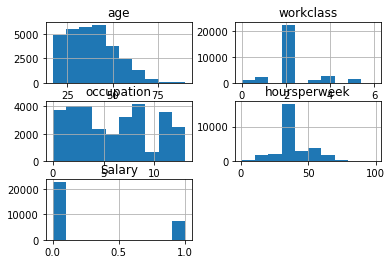

In [8]:
data.hist()

In [9]:
array = data.values
X = array[:,0:4]
Y = array[:,4]

In [10]:
X

array([[39,  5,  0, 40],
       [50,  4,  3, 13],
       [38,  2,  5, 40],
       ...,
       [58,  2,  0, 40],
       [22,  2,  0, 20],
       [52,  3,  3, 40]], dtype=int64)

In [11]:
Y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [14]:
classifier = SVC()

In [15]:
classifier.fit(X_train, Y_train)

SVC()

In [16]:
score = classifier.score(X_test , Y_test)

In [17]:
score

0.7449441927284783